In [3]:
import matplotlib.pyplot as plt
import numpy as np
episodes = 1000
gamma = 0.99
alpha = 0.01
rho_dashed = 0
rho_solid = 1/(1/7)
reward = 0
numofstates = 7

theta = [1,1,1,1,1,1,10,1]
thetas = np.zeros([len(theta),episodes])
value = np.zeros(7)
features = np.zeros([7,8])
for i in range(7):
    features[i][i] = 2
    features[i][7] = 1
features[6][6] = 1
features[6][7] = 2


In [4]:
def execute_action(state):
    #solid action
    if np.random.binomial(1,1/7) == 1:
        return 1, numofstates-1
    else:
        return 0, np.random.randint(0, numofstates-1)


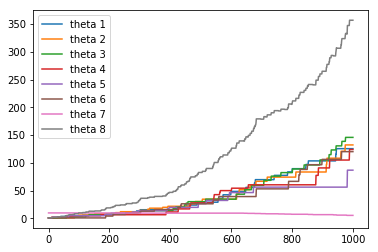

In [5]:
for i in range(1000):    
    state = np.random.randint(0,numofstates)
    action, next_state = execute_action(state)
    
    if action == 1:
        rho = rho_solid
    else:
        rho = rho_dashed
    
    value = np.dot(features, theta)
    delta = reward + gamma*value[next_state] - value[state]
    delta *= rho*alpha
    #     update theta
    theta += features[state,:]*delta
    thetas[:,i] = theta
    state = next_state
for i in range(8):
    plt.plot(thetas[i,:],label='theta '+ str(i+1))
plt.legend()
plt.show()

## Exercise
https://classroom.udacity.com/courses/ud600/lessons/4627968925/concepts/46743885780923

In [6]:
w = np.ones(8)
f = np.zeros([7,8])
for i in range(7):
    f[i][0] = 1
    f[i][i+1] = 2
f[6][0] = 7
f[6][7] = 1

for i in range(7):
    v = np.dot(f,w) 
    delta = 0.9 * v[6] - v[i]
    w[0] += 0.1 * delta * f[i][0]
    w[i+1] += 0.1 * delta * f[i][i+1]
    print(w[0])


1.42
2.0626
3.045778
4.55004034
6.8515617202
10.3728894319
5.22017361027
